In [20]:
import yfinance as yf
import pandas as pd

ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2021-12-31")
data.to_csv("../data/AAPL_historical.csv")

data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320429,24.789798,23.879978,24.778675,212818400
2015-01-05,23.635286,24.169166,23.448429,24.089084,257142000
2015-01-06,23.637514,23.897780,23.274920,23.699800,263188400
2015-01-07,23.968964,24.069065,23.735391,23.846616,160423600
2015-01-08,24.889904,24.947741,24.180289,24.298189,237458000


In [21]:
import pandas as pd

df = pd.read_csv("../data/AAPL_historical.csv", skiprows=1)

print(df.columns)


Index(['Ticker', 'AAPL', 'AAPL.1', 'AAPL.2', 'AAPL.3', 'AAPL.4'], dtype='object')


In [22]:
import pandas as pd

df = pd.read_csv("../data/AAPL_historical.csv", skiprows=2)

df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

df.set_index("Date", inplace=True)

print(df.head())
print(df.info())


                Close       High        Low       Open     Volume
Date                                                             
2015-01-02  24.320429  24.789798  23.879978  24.778675  212818400
2015-01-05  23.635286  24.169166  23.448429  24.089084  257142000
2015-01-06  23.637514  23.897780  23.274920  23.699800  263188400
2015-01-07  23.968964  24.069065  23.735391  23.846616  160423600
2015-01-08  24.889904  24.947741  24.180289  24.298189  237458000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2015-01-02 to 2021-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1762 non-null   float64
 1   High    1762 non-null   float64
 2   Low     1762 non-null   float64
 3   Open    1762 non-null   float64
 4   Volume  1762 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 82.6 KB
None


In [23]:
print(df.isnull().sum())


Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [24]:
print(df.describe())


             Close         High          Low         Open        Volume
count  1762.000000  1762.000000  1762.000000  1762.000000  1.762000e+03
mean     58.828195    59.415252    58.181017    58.785296  1.380592e+08
std      40.138889    40.589638    39.632545    40.102176  6.977922e+07
min      20.674528    20.978906    20.475428    20.596722  4.100000e+07
25%      28.202077    28.410029    27.985270    28.195980  9.050462e+07
50%      41.673559    41.948166    41.292566    41.655041  1.189708e+08
75%      74.955551    75.653925    73.986725    74.824895  1.654159e+08
max     177.228806   178.997867   175.459771   178.005227  6.488252e+08


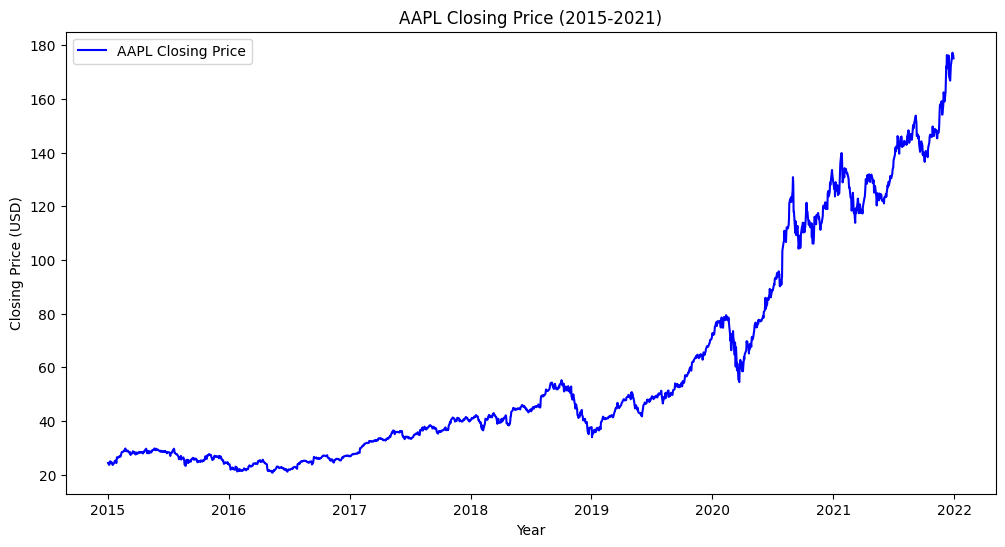

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="AAPL Closing Price", color='blue')
plt.xlabel("Year")
plt.ylabel("Closing Price (USD)")
plt.title("AAPL Closing Price (2015-2021)")
plt.legend()
plt.show()


In [26]:
df["Daily Return"] = df["Close"].pct_change()


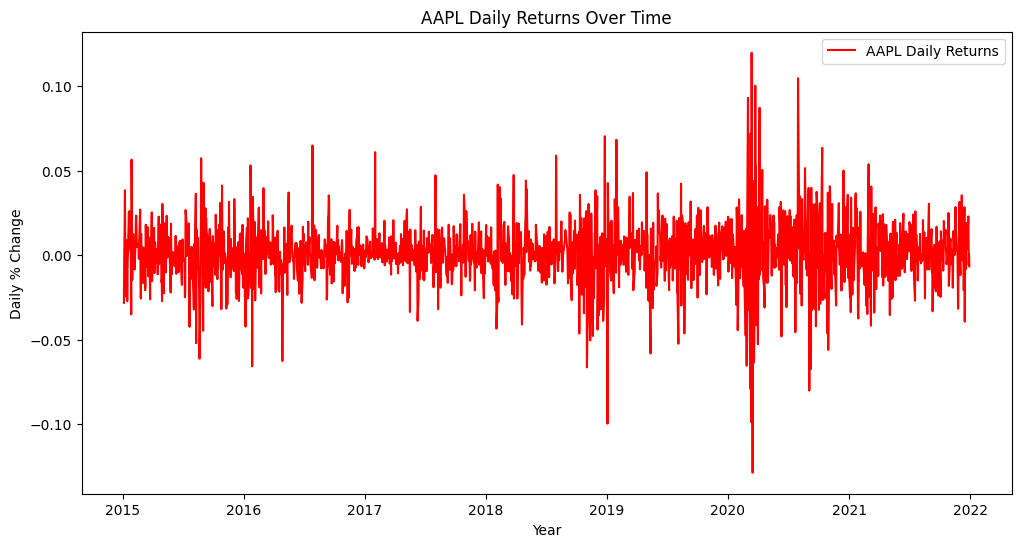

In [27]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Daily Return"], label="AAPL Daily Returns", color='red')
plt.xlabel("Year")
plt.ylabel("Daily % Change")
plt.title("AAPL Daily Returns Over Time")
plt.legend()
plt.show()


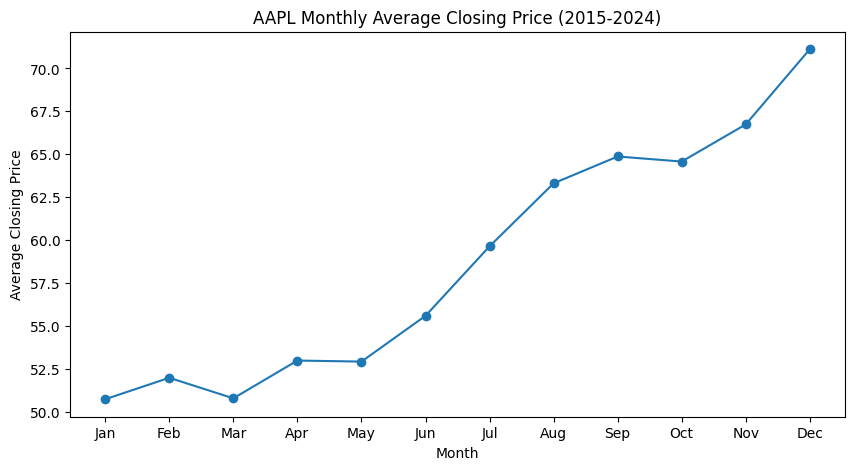

In [28]:
df["Month"] = df.index.month
monthly_avg = df.groupby("Month")["Close"].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_avg, marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.title("AAPL Monthly Average Closing Price (2015-2024)")
plt.xticks(range(1,13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()
